In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Generate synthetic features
X1 = np.random.normal(0, 1, n_samples)
X2 = np.random.normal(0, 1, n_samples)

# True coefficients for the logistic regression model
true_beta0 = -1.0  # Intercept
true_beta1 = 2.0   # Coefficient for X1
true_beta2 = -1.5  # Coefficient for X2

# Generate probabilities using the logistic function
p = 1 / (1 + np.exp(-(true_beta0 + true_beta1 * X1 + true_beta2 * X2)))

# Generate binary labels based on the probabilities
y = np.random.binomial(1, p, n_samples)

# Create a DataFrame
data = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})

# Prepare the data for logistic regression
X = data[['X1', 'X2']]
X = sm.add_constant(X)  # Add an intercept term
y = data['y']

# Fit the logistic regression model
logit_model = sm.Logit(y, X).fit()

# Print the model summary
print(logit_model.summary())

# Number of simulations
n_simulations = 10000

# Generate samples from the posterior distribution of the coefficients
simulated_betas = np.random.multivariate_normal(logit_model.params, logit_model.cov_params(), n_simulations)

# Calculate the mean and standard deviation of the simulated coefficients
simulated_mean = np.mean(simulated_betas, axis=0)
simulated_std = np.std(simulated_betas, axis=0)

# Print the results
print("Simulated Mean of Coefficients:")
print(simulated_mean)
print("\nSimulated Standard Deviation of Coefficients:")
print(simulated_std)



Optimization terminated successfully.
         Current function value: 0.363138
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Wed, 31 Jul 2024   Pseudo R-squ.:                  0.4412
Time:                        14:42:24   Log-Likelihood:                -363.14
converged:                       True   LL-Null:                       -649.89
Covariance Type:            nonrobust   LLR p-value:                2.924e-125
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1190      0.106    -10.539      0.000      -1.327      -0.911
X1             2.0483      0.


# Final Code
<span style="color: orange; font-size: 40px;">Implement approximate inference methods like Monte Carlo simulations.</span>

Estimated Average Wait Time: 2021.41


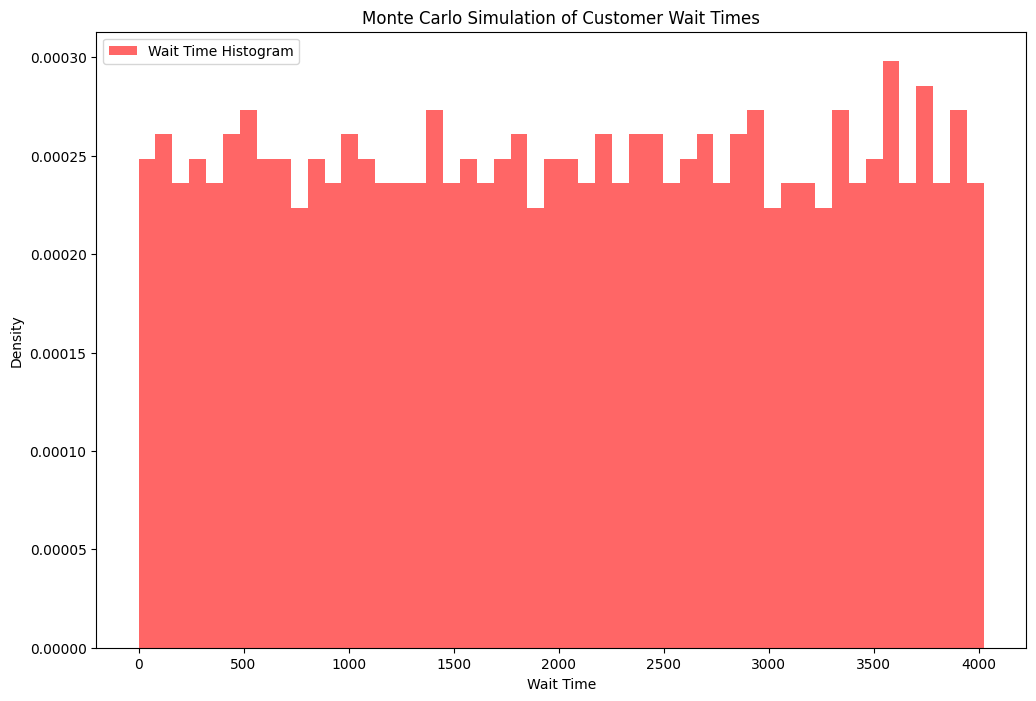

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_queue(num_customers, arrival_rate, service_mean, service_std):
    # Generate arrival times (Exponential distribution)
    inter_arrival_times = np.random.exponential(scale=1/arrival_rate, size=num_customers)
    arrival_times = np.cumsum(inter_arrival_times)
    
    # Generate service times (Normal distribution)
    service_times = np.random.normal(service_mean, service_std, num_customers)
    
    # Calculate wait times
    wait_times = np.zeros(num_customers)
    departure_times = np.zeros(num_customers)
    
    for i in range(num_customers):
        if i == 0:
            wait_times[i] = 0
        else:
            wait_times[i] = max(0, departure_times[i-1] - arrival_times[i])
        
        departure_times[i] = arrival_times[i] + wait_times[i] + service_times[i]
    
    average_wait_time = np.mean(wait_times)
    return average_wait_time, wait_times, arrival_times, service_times

# Parameters
num_customers = 1000
arrival_rate = 1.0  # Average arrival rate (customers per unit time)
service_mean = 5.0  # Mean service time
service_std = 1.0   # Standard deviation of service time

# Run simulation
average_wait_time, wait_times, arrival_times, service_times = simulate_queue(num_customers, arrival_rate, service_mean, service_std)

print(f"Estimated Average Wait Time: {average_wait_time:.2f}")

# Plotting
plt.figure(figsize=(12, 8))

plt.hist(wait_times, bins=50, density=True, alpha=0.6, color='red', label='Wait Time Histogram')

plt.title('Monte Carlo Simulation of Customer Wait Times')
plt.xlabel('Wait Time')
plt.ylabel('Density')
plt.legend()
plt.show()
